## Visualize MRI Brain Slices



In [3]:
import numpy as np
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
#Load in numpy data, 4d transposed image

img_4d = np.load('data/subject_10004_08693_4d.npy')
img_4d.shape

(79, 95, 79, 144)

plotting layer 31 at time point 139 of Image


(-0.5, 94.5, 78.5, -0.5)

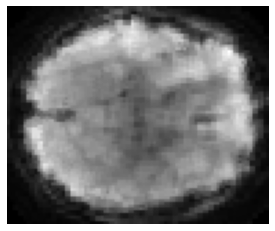

In [38]:
# Visualize a layer of the image

maxval = 94

layer = np.random.randint(0, maxval)

time_point = 139
print(f"plotting layer {layer} at time point {time_point} of Image")
plt.imshow(img_4d[:,:,layer, time_point], cmap = 'gray')
plt.axis('off')

In [43]:
# Visualize all the layers of the brain at a specific time point
time_point = 139

def explore_4d_img(layer):
    plt.figure(figsize = (10, 5))
    plt.imshow(img_4d[:, :, layer, time_point], cmap = 'gray')
    plt.title("Layers of the brain")
    plt.axis('off')
    return layer

# Call interactive component of function above at time point 139 
interact(explore_4d_img, layer = (0, img_4d.shape[2] - 1))

interactive(children=(IntSlider(value=39, description='layer', max=78), Output()), _dom_classes=('widget-inter…

<function __main__.explore_4d_img(layer)>

## Visualize voxel distributions

### Explore Data labels
- check balance of classes


In [4]:
# visualize mask image
#Load in numpy data
masked_2d = np.load('data/mask_single_sub.npy')
masked_2d.shape

(84, 237979)

In [9]:
import nitime
#Import the time-series objects:
from nitime.timeseries import TimeSeries
#Import utility functions:
from nitime.utils import percent_change
from nitime.analysis import NormalizationAnalyzer

In [93]:
n_samples = masked_2d.shape[0]
print("number of samples in single subject run: ", n_samples)

t = TimeSeries(masked_2d, sampling_interval = 1.89)
p_ch = NormalizationAnalyzer(t).percent_change
print("shape of normalized data: ", p_ch.shape)
p_ch

number of samples in single subject run:  84
shape of normalized data:  (84, 237979)


TimeSeries:UniformTime([0.0000000e+00, 1.8900000e+00, 3.7800000e+00, ...,
             4.4977464e+05, 4.4977653e+05, 4.4977842e+05], time_unit='s')array([[-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       [-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       [-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       ...,
       [ -66.48429102,  -66.50041695,  -66.68514171, ...,  -66.41838679,
         -68.10412048,  -67.10349446],
       [ -62.44165439,  -62.37557823,  -62.96921566, ...,  -59.38646602,
         -61.56086909,  -62.59468577],
       [ -61.94244261,  -61.21669497,  -61.24961158, ...,  -57.70985097,
         -61.38295591,  -61.04231084]])

In [97]:
type(p_ch)

nitime.timeseries.TimeSeries

In [96]:
np.asarray(p_ch)

array([[-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       [-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       [-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       ...,
       [ -66.48429102,  -66.50041695,  -66.68514171, ...,  -66.41838679,
         -68.10412048,  -67.10349446],
       [ -62.44165439,  -62.37557823,  -62.96921566, ...,  -59.38646602,
         -61.56086909,  -62.59468577],
       [ -61.94244261,  -61.21669497,  -61.24961158, ...,  -57.70985097,
         -61.38295591,  -61.04231084]])